In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('Dataset.csv',header=None,names=['x','y'])

In [2]:
data_mean=dataset.mean(axis=0)

In [3]:
centered_data=dataset-data_mean

In [4]:
centered_data.mean(axis=0)

x    2.398082e-17
y   -5.151435e-17
dtype: float64

In [5]:
import numpy as np
covariance_matrix=np.dot(centered_data.transpose(),centered_data)

covariance_matrix=covariance_matrix/len(dataset)

In [6]:
eigval,eigvec=np.linalg.eig(covariance_matrix)
eigvec=eigvec.transpose()
eigenvalues=eigval[::-1]
principle_components=eigvec[::-1]

In [7]:
sum=eigenvalues[0]+eigenvalues[1]
print(eigenvalues[0])
print(eigenvalues[1])
variance_w1=eigenvalues[0]/sum
variance_w2=eigenvalues[1]/sum
coefficients=np.dot(centered_data,principle_components)
print("Variance w1=",variance_w1*100)
print("Variance w2=",variance_w2*100)

17.131914402444366
14.489604749330637
Variance w1= 54.17802452885222
Variance w2= 45.821975471147766


In [8]:
coeff_w1=coefficients[:,0].reshape(1000,1)
coeff_w2=coefficients[:,1].reshape(1000,1)
w1=principle_components[:,0].reshape(1,2)
w2=principle_components[:,1].reshape(1,2)

In [9]:
cw1=np.dot(coeff_w1,w1)
cw2=np.dot(coeff_w2,w2)

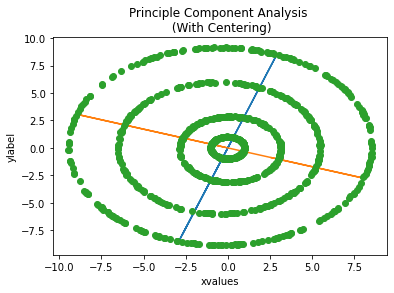

In [10]:
plt.plot(cw1[:,0],cw1[:,1])
plt.plot(cw2[:,0],cw2[:,1])
plt.title("Principle Component Analysis \n (With Centering)")
plt.plot(dataset['x'],dataset['y'],'o')
plt.xlabel("xvalues")
plt.ylabel("ylabel")
plt.show()